In [1]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

print("import succesfull")

import succesfull


In [2]:
df = pd.read_csv('delhi_monthly_all.csv')
df = df.groupby('City').get_group('Delhi')
df = df[:-6]
df.tail(6)

,City,Date,PM2_5,PM10,NO,NO2,NOx,CO,SO2,O3,NH3,Benzene,Toluene,Xylene,AQI
54,Delhi,31/7/2019,46.733548,140.82680,14.48677,30.46290,30.21533,1.100645,9.602258,33.46452,32.63452,2.128710,20.43710,0.570000,145.096774
55,Delhi,31/8/2019,34.116774,81.95677,17.79323,30.38065,33.41968,1.085806,8.796452,27.61839,31.96323,2.154839,21.61419,1.628710,99.290323
56,Delhi,30/9/2019,40.132667,96.85533,12.25300,30.78433,28.45900,0.961000,9.172000,30.56700,28.23000,2.036000,20.16233,1.018000,106.533333
57,Delhi,31/10/2019,123.657097,238.37130,39.92742,47.94032,60.29323,1.549032,12.077740,42.79097,34.04774,4.435161,32.03677,2.362903,251.000000
58,Delhi,30/11/2019,205.393667,314.43770,43.44033,54.72200,68.69300,1.695333,13.109330,34.24667,38.81267,4.909333,37.23133,1.298000,356.100000
59,Delhi,31/12/2019,205.241613,308.63970,49.79161,55.48548,73.67774,1.761935,10.302260,29.83226,51.48742,5.280000,35.33258,1.088387,353.903226


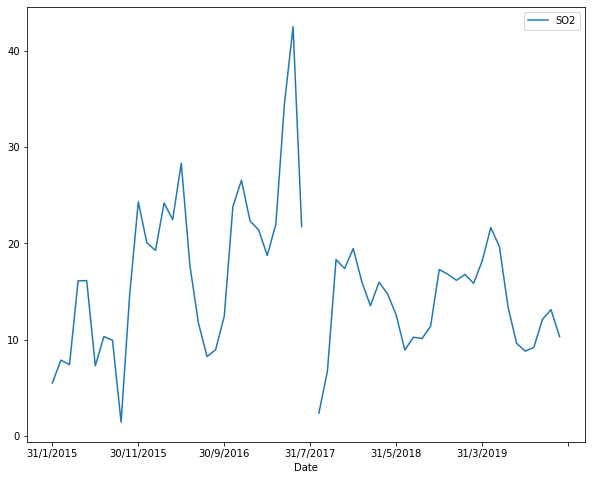

In [3]:
df.drop(['City','PM2_5','AQI','NO2','O3','NO','CO','PM10','NOx','Xylene','NH3','Benzene','Toluene'], axis=1, inplace=True)
# df.drop(['Nitric Oxide (ug/m3)','Nitrogen Dioxide (ug/m3)','Oxides of Nitrogen (ug/m3)','Ozone (ug/m3)','PM2_5 Particulate (ug/m3)','Sulphur Dioxide (ug/m3)'], axis=1, inplace=True)
df.plot(x = 'Date', y = 'SO2')

In [4]:
df = df.dropna(how='any')
df.shape

(59, 2)

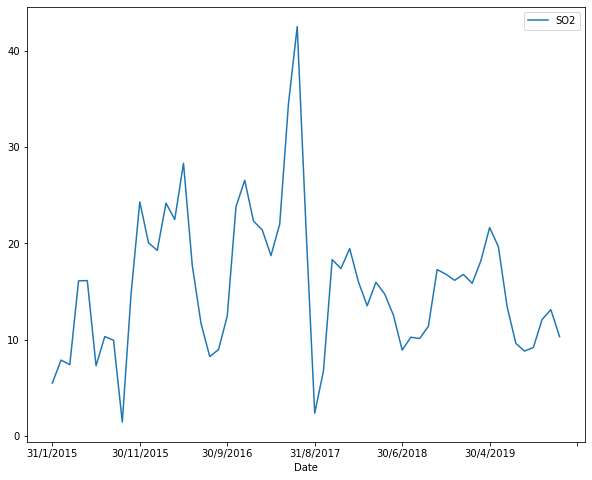

In [5]:
# df['Xylene'] = df['Xylene'] - df['Xylene'].shift(1)
# # mean = df.rolling(window=10).mean()
df.plot.line(x='Date',y='SO2')

In [6]:
df['ds'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')
print(df.shape)
df.head()

(59, 3)


<ipython-input-6-0d436fa08c19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['Date'],format='%d/%m/%Y')


,Date,SO2,ds
0,31/1/2015,5.472333,2015-01-31
1,28/2/2015,7.863214,2015-02-28
2,31/3/2015,7.387097,2015-03-31
3,30/4/2015,16.101330,2015-04-30
4,31/5/2015,16.129030,2015-05-31


In [7]:
# import numpy as np
# df['Xylene'] = np.log(df['Xylene'])

In [8]:
df.describe()

,SO2
count,59.000000
mean,15.666268
std,7.401857
min,1.422533
25%,10.172905
50%,15.957740
75%,19.561290
max,42.531290


In [9]:
df.drop(['Date'], axis=1, inplace=True)
df.columns = ['y', 'ds']


C:\Users\skati\Miniconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
df.tail(6)

,y,ds
54,9.602258,2019-07-31
55,8.796452,2019-08-31
56,9.172000,2019-09-30
57,12.077740,2019-10-31
58,13.109330,2019-11-30
59,10.302260,2019-12-31


In [11]:
df = df.dropna(how='any')
df.shape
min_thresold, max_thresold = df.y.quantile([0.05, 0.95])
print(min_thresold, max_thresold )

6.6024333 26.74196399999999


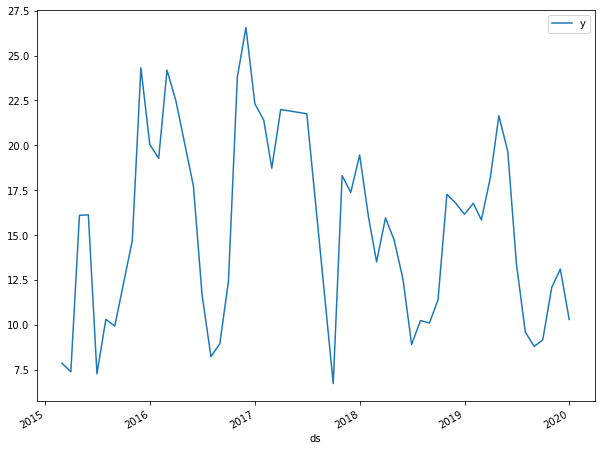

In [12]:
df = df[(df.y<max_thresold) & (df.y>min_thresold)]
df.plot(x = 'ds', y = 'y')

In [13]:
print(df.shape)
#54 months as train data
# df = df[1:]
train = df[:-6]
print(train.shape)
#6 months as test data
test = df[-6:]
print(test.shape)


(53, 2)
(47, 2)
(6, 2)


In [14]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95,yearly_seasonality=True)
m.fit(train)
future = m.make_future_dataframe(periods=6,freq='M',include_history=True)
future.tail(6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
47,2019-07-31
48,2019-08-31
49,2019-09-30
50,2019-10-31
51,2019-11-30
52,2019-12-31


In [15]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(6)

,ds,yhat,yhat_lower,yhat_upper
47,2019-07-31,11.210933,5.040599,16.997836
48,2019-08-31,11.264361,4.682259,16.961563
49,2019-09-30,11.476986,5.503074,17.261146
50,2019-10-31,17.137817,10.803372,23.285282
51,2019-11-30,23.826975,17.903247,29.996875
52,2019-12-31,22.057630,16.139148,28.239452


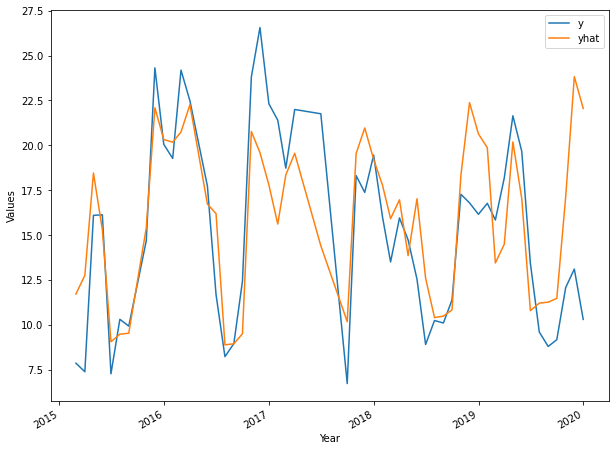

In [16]:
df['Year'] = df['ds']
forecast['Year'] = forecast['ds']
pd.concat([df.set_index('Year')['y'],forecast.set_index('Year')['yhat']],axis=1).plot(ylabel="Values")

In [17]:
# pd.concat([df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).tail(6)
df = pd.concat([df.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).dropna(how='any')
df.head()

,y,yhat
ds,,
2015-02-28,7.863214,11.718364
2015-03-31,7.387097,12.755882
2015-04-30,16.101330,18.460065
2015-05-31,16.129030,15.295827
2015-06-30,7.272667,9.058858


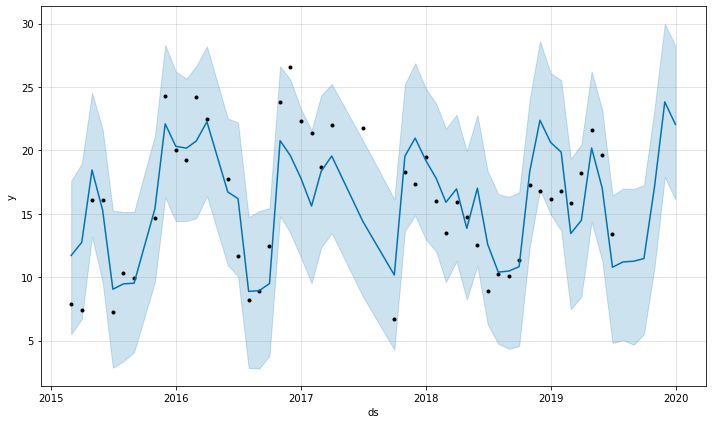

In [18]:
fig1 = m.plot(forecast)

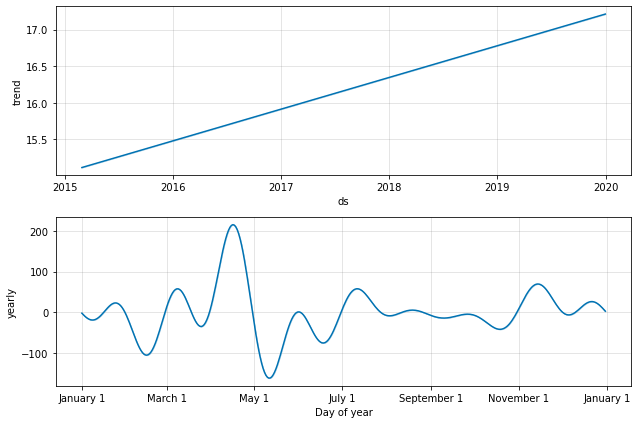

In [19]:
fig2 = m.plot_components(forecast)

In [20]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = m,horizon='250 days')

cv_results.head(5)

INFO:fbprophet:Making 5 forecasts with cutoffs between 2017-06-10 00:00:00 and 2018-10-23 00:00:00


  0%|          | 0/5 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 18.
INFO:fbprophet:n_changepoints greater than number of observations. Using 19.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2017-06-30,16.169419,13.355041,18.970788,21.76000,2017-06-10
1,2017-09-30,12.917382,10.085713,15.728952,6.72800,2017-06-10
2,2017-10-31,26.096956,23.281797,29.029556,18.31419,2017-06-10
3,2017-11-30,30.961471,28.152823,33.915910,17.37933,2017-06-10
4,2017-12-31,26.646471,23.701685,29.403791,19.46000,2017-06-10


In [21]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,13 days,11.813466,3.437072,3.141197,0.284542,0.262157,1.000000
1,18 days,39.069290,6.250543,5.762167,0.426266,0.498576,0.666667
2,20 days,42.389395,6.510714,6.087503,0.339218,0.262157,0.333333
3,38 days,57.944379,7.612121,7.471983,0.404534,0.458106,0.000000
4,41 days,30.565356,5.528594,4.799271,0.274561,0.256920,0.333333
5,44 days,20.411395,4.517897,3.232527,0.207519,0.108656,0.666667
6,48 days,76.508425,8.746909,5.695380,0.344105,0.108656,0.666667
7,69 days,88.684479,9.417244,7.372904,0.434652,0.380296,0.333333
8,72 days,89.098149,9.439182,7.551485,0.463103,0.380296,0.333333
9,74 days,15.028814,3.876701,3.290229,0.225826,0.156036,0.666667


In [22]:
from sklearn.metrics import  r2_score, mean_absolute_error, mean_absolute_percentage_error

In [23]:
#training data
y_true = df['y'][:-6].values
y_pred = forecast['yhat'][:-6].values
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('r2: %.3f' % r2)

MAPE: 0.168
MAE: 2.419
r2: 0.654


In [24]:
#testing data
y_true = df['y'][-6:].values
y_pred = forecast['yhat'][-6:].values
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('r2: %.3f' % r2)

MAPE: 0.513
MAE: 5.652
r2: -18.763


In [25]:
y_true = df['y'].values
y_pred = forecast['yhat'].values
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('r2: %.3f' % r2)

MAPE: 0.207
MAE: 2.785
r2: 0.492


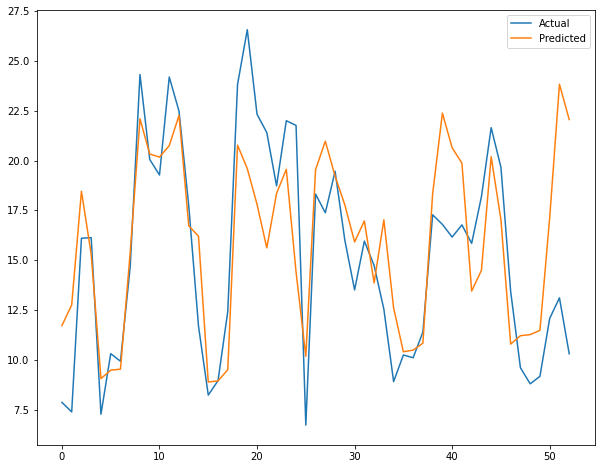

In [26]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [27]:
holiday = pd.DataFrame({
    'holiday':'regional',
    'ds':pd.to_datetime(['04-01-2015', '26-01-2015', '06-03-2015', '28-03-2015', '02-04-2015', '03-04-2015', '01-05-2015', '18-07-2015', '15-08-2015', '05-09-2015', '25-09-2015', '02-10-2015', '22-10-2015', '24-10-2015', '11-11-2015', '25-11-2015', '24-12-2015', '25-12-2015', '26-01-2016', '24-03-2016', '25-03-2016', '01-04-2016', '15-04-2016', '19-04-2016', '21-05-2016', '06-07-2016', '15-08-2016', '25-08-2016', '12-09-2016', '02-10-2016', '11-10-2016', '12-10-2016', '15-10-2016', '30-10-2016', '14-11-2016', '12-12-2016', '25-12-2016', '05-01-2017', '26-01-2017', '24-02-2017', '01-04-2017', '04-04-2017', '09-04-2017', '14-04-2017', '10-05-2017', '26-06-2017', '15-08-2017', '02-09-2017', '30-09-2017', '01-10-2017', '02-10-2017', '05-10-2017', '19-10-2017', '26-10-2017', '04-11-2017', '14-11-2017', '02-12-2017', '25-12-2017', '26-01-2018', '14-02-2018', '02-03-2018', '29-03-2018', '01-04-2018', '30-04-2018', '10-05-2018', '16-06-2018', '15-08-2018', '17-08-2018', '22-08-2018', '03-09-2018', '21-09-2018', '02-10-2018', '19-10-2018', '24-10-2018', '07-11-2018', '21-11-2018', '23-11-2018', '25-12-2018', '26-01-2018', '14-02-2018', '02-03-2018', '29-03-2018', '01-04-2018', '30-04-2018', '10-05-2018', '16-06-2018', '15-08-2018', '17-08-2018', '22-08-2018', '03-09-2018', '21-09-2018', '02-10-2018', '19-10-2018', '24-10-2018', '07-11-2018', '21-11-2018', '23-11-2018', '25-12-2018', '26-01-2019', '04-03-2019', '21-03-2019', '01-04-2019', '14-04-2019', '17-04-2019', '19-04-2019', '18-05-2019', '05-06-2019', '12-08-2019', '15-08-2019', '24-08-2019', '10-09-2019', '02-10-2019', '08-10-2019', '13-10-2019', '27-10-2019', '02-11-2019', '10-11-2019', '12-11-2019', '25-12-2019','30-04-2020', '31-05-2020', '30-06-2020']),
    'lower_window':0,
    'upper_window':1
})

In [28]:
m = Prophet(holidays=holiday)
forcast = m.fit(df).predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
from fbprophet.diagnostics import cross_validation
cv_results = cross_validation(model = m,horizon='365 days')
cv_results.head(5)

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(cv_results)
df_p

In [ ]:
y_true = df['y'][:-6].values
y_pred = forecast['yhat'][:-6].values
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('r2: %.3f' % r2)

In [ ]:
y_true = df['y'][-6:].values
y_pred = forecast['yhat'][-6:].values
mape = mean_absolute_percentage_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
print('MAPE: %.3f' % mape)
print('MAE: %.3f' % mae)
print('r2: %.3f' % r2)

In [ ]:
from matplotlib import pyplot
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()